# Issues Arising from Genome Incompleteness

The purpose of this notebook is to explore issues arising from genome incompleteness. It will examine three major areas:
1. ANI and coverage cutoffs.  
    To be confident in our ANI and coverage cutoffs, we need to be confident we have enough samples such that acculumating more SAGs doesn't change the ANI cutoff.
2. Core genome.  
    My proposal to resolve incompleteness among individual genomes is to merge all metabolic network graphs belonging to genomes from the same tribe. I want to explore how estimated completeness (based on marker genes) increases as genomes are merged.
3. Pan genome.
    My proposal to resolve incompleteness among individual genomes is to merge all metabolic network graphs belonging to genomes from the same tribe. I want to explore how our estimation of the pan-genome for a tribe changes as more genomes get sampled.
    
The first chunk of code identifies imports the Python packages necessary for this analysis.

In [1]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import pairwiseANIFunctions as ANI
import markerGeneFunctions as mg

# Define local folder structure for data input and processing.
externalDataDir = 'ExternalData'

##ANI and Coverage Cutoffs

### ANI Cutoff

In order to have a robust estimate of the ANI which defines a tribe (or clade, or lineage), we need to be confident we have enough samples (e.g., so that acculumating more SAGs doesn't change the ANI cutoff). Let's see how many samples we have from each tribe:

In [2]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'ANI_out')

,Samples,Num Samples,Max,Min
Iluma-A2,[AAA027E14],1,99.97,99.97
Iluma-B1,[AAA027L17],1,99.54,99.54
Iluma-B2,[AAA028K15],1,99.53,99.53
Luna1-A2,[AAA028P02],1,100,100
acI-A1,"[AAA027M14, AAA278O22]",2,100,79.56
acI-A5,"[AAA028G02, AAA044O16]",2,99.95,86.69
acI-A6,"[AAA028E20, AAA028I14]",2,100,81.17
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,100,87.13
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,100,79.06
acI-B4,[AAA044D11],1,100,100


These results indicate a cutoff of 79.06%, from the acI-B1 tribe. 

Let's suppose these six SAGs are representative of the entire acI-B1 sequence space. Suppose we only sequenced two SAGs. The function below will compute all possible pairs and their max and min ANI:

In [3]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGs.csv')
ANI.worstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'ANI_out', 'acI-B1', 2)

                        Max    Min
(AAA023D18, AAA027J17)  100  79.88
(AAA023D18, AAA027L06)  100  80.01
(AAA023D18, AAA028A23)  100  80.01
(AAA023D18, AAA278I18)  100  80.94
(AAA023D18, AB141P03)   100  79.45
(AAA027J17, AAA027L06)  100  81.76
(AAA027J17, AAA028A23)  100  81.74
(AAA027J17, AAA278I18)  100   80.1
(AAA027J17, AB141P03)   100  80.68
(AAA027L06, AAA028A23)  100  99.08
(AAA027L06, AAA278I18)  100  79.44
(AAA027L06, AB141P03)   100  96.44
(AAA028A23, AAA278I18)  100  79.32
(AAA028A23, AB141P03)   100  96.36
(AAA278I18, AB141P03)   100  79.06
Sampling tribe acI-B1 with sample size 2.
The worst-case minimum ANI is: 99.08


If we were especially unlucky, we would have sequenced SAGs L06 and A23, and we would have predicted a tribe-specific cutoff of 99.08 ANI. What if we instead sampled three SAGs:

In [4]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGs.csv')
ANI.worstCaseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'ANI_out', 'acI-B1', 3)

                                   Max    Min
(AAA023D18, AAA027J17, AAA027L06)  100  79.88
(AAA023D18, AAA027J17, AAA028A23)  100  79.88
(AAA023D18, AAA027J17, AAA278I18)  100  79.88
(AAA023D18, AAA027J17, AB141P03)   100  79.45
(AAA023D18, AAA027L06, AAA028A23)  100  80.01
(AAA023D18, AAA027L06, AAA278I18)  100  79.44
(AAA023D18, AAA027L06, AB141P03)   100  79.45
(AAA023D18, AAA028A23, AAA278I18)  100  79.32
(AAA023D18, AAA028A23, AB141P03)   100  79.45
(AAA023D18, AAA278I18, AB141P03)   100  79.06
(AAA027J17, AAA027L06, AAA028A23)  100  81.74
(AAA027J17, AAA027L06, AAA278I18)  100  79.44
(AAA027J17, AAA027L06, AB141P03)   100  80.68
(AAA027J17, AAA028A23, AAA278I18)  100  79.32
(AAA027J17, AAA028A23, AB141P03)   100  80.68
(AAA027J17, AAA278I18, AB141P03)   100  79.06
(AAA027L06, AAA028A23, AAA278I18)  100  79.32
(AAA027L06, AAA028A23, AB141P03)   100  96.36
(AAA027L06, AAA278I18, AB141P03)   100  79.06
(AAA028A23, AAA278I18, AB141P03)   100  79.06
Sampling tribe acI-B1 with sample 

If we were again unlucky, we would have sequenced SAGs L06, A23, and P03, and we would have predicted a tribe-specific cutoff of 96.36 ANI. Let's define a new function which repeats this calculation for all possible sample sizes (up to 6 for tribe acI-B1).

Sampling tribe acI-B1 with sample size 2.
The worst-case minimum is: 99.08
Sampling tribe acI-B1 with sample size 3.
The worst-case minimum is: 96.36
Sampling tribe acI-B1 with sample size 4.
The worst-case minimum is: 80.68
Sampling tribe acI-B1 with sample size 5.
The worst-case minimum is: 79.45
Sampling tribe acI-B1 with sample size 6.
The worst-case minimum is: 79.06


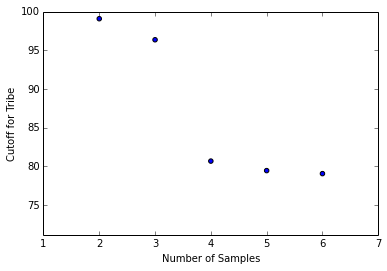

In [5]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGs.csv')
ANI.allWorstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'ANI_out', 'acI-B1')

So these six samples appear to be enough.

### Coverage Cutoff

We likewise need enough samples to ensure that our estimate of the coverage cutoff isn't changing. Let's examine the cutoffs:

In [6]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'COV_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'COV_out')

,Samples,Num Samples,Max,Min
Iluma-A2,[AAA027E14],1,100.01,100.01
Iluma-B1,[AAA027L17],1,101.72,101.72
Iluma-B2,[AAA028K15],1,102.41,102.41
Luna1-A2,[AAA028P02],1,100.38,100.38
acI-A1,"[AAA027M14, AAA278O22]",2,100.66,22.69
acI-A5,"[AAA028G02, AAA044O16]",2,101.07,52.23
acI-A6,"[AAA028E20, AAA028I14]",2,105.56,16.34
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,105.08,35.85
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,109.56,18.96
acI-B4,[AAA044D11],1,100.12,100.12


These results indicate a cutoff of 16.34% cutoff, from the acI-A6 tribe. The acI-B1 tribe is not far behind, with an 18.96% cutoff. The metadata indicate that one acI-A6 SAG is estimated to be 14% complete. This may contribute to the low coverage value. Among the acI-B1 genomes, again one genome is estimated to be 14% complete.

However, genomes from the tribes acI-A1 and acI-A7 are predicted to be even more complete, so completeness alone cannot explain low coverage. Likely it is due to a combination of completeness and varying levels of diversity within each tribe.

Just for fun let's look at the expected completeness cutoff for different numbers of acI-B1 samples.

Sampling tribe acI-B1 with sample size 2.
The worst-case minimum is: 86.92
Sampling tribe acI-B1 with sample size 3.
The worst-case minimum is: 68.6
Sampling tribe acI-B1 with sample size 4.
The worst-case minimum is: 25.49
Sampling tribe acI-B1 with sample size 5.
The worst-case minimum is: 22.87
Sampling tribe acI-B1 with sample size 6.
The worst-case minimum is: 18.96


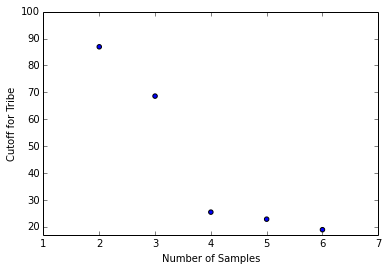

In [7]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'COV_out', 'taxonomySAGs.csv')
ANI.allWorstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'COV_out', 'acI-B1')

Within this tribe, the coverage cutoff has a noticable drop at 4 samples, and does not change much as more samples get added. Our lowest cutoff comes from the acI-A6 tribe, with just two samples, so additional SAGs from that tribe might be helpful.

## Marker Genes

I expect that merging metabolic network graphs for genomes from the same tribe will give a metabolic network graph which better represents the metabolic capabilites of the tribe. As a corollary, as I sample more genomes from the same tribe, I expect that the number of observed marker genes will increase.

### Phylosift Marker Genes

First let's see the maximum and minimum estimated completeness for each tribe:

In [8]:
[markerGeneDF, taxonClass, tribes] = mg.importMarkerGenesAndTaxonomy(externalDataDir, 'phylosiftMarkerGenes.csv', 'taxonomySAGs.csv')
mg.indivCompleteness(externalDataDir, markerGeneDF, 37, taxonClass, tribes)

,Samples,Num Samples,Max,Min
Iluma-A2,[AAA027E14],1,0.5945946,0.5945946
Iluma-B1,[AAA027L17],1,0.7837838,0.7837838
Iluma-B2,[AAA028K15],1,0.08108108,0.08108108
Luna1-A2,[AAA028P02],1,0.8378378,0.8378378
acI-A1,"[AAA027M14, AAA278O22]",2,0.972973,0.05405405
acI-A5,"[AAA028G02, AAA044O16]",2,0.972973,0.9459459
acI-A6,"[AAA028E20, AAA028I14]",2,0.8378378,0.1351351
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,0.7567568,0.1081081
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,0.972973,0.1351351
acI-B4,[AAA044D11],1,0.9459459,0.9459459


Let's consider the trib acI-B6, where samples range from 13.5% to 97% complete. Let's suppose these six SAGs are representative of the entire acI-B1 sequence space. Suppose we only sequenced two SAGs. The function below will compute all possible pairs and the total number of marker genes between them.

In [9]:
[markerGeneDF, taxonClass, tribes] = mg.importMarkerGenesAndTaxonomy(externalDataDir, 'phylosiftMarkerGenes.csv', 'taxonomySAGs.csv')
mg.worstCaseCompleteness(externalDataDir, markerGeneDF, 37, taxonClass, tribes, 'acI-B1', 2)

                       Count    Percent
(AAA023D18, AAA027J17)    36   0.972973
(AAA023D18, AAA027L06)    36   0.972973
(AAA023D18, AAA028A23)    33  0.8918919
(AAA023D18, AAA278I18)    24  0.6486486
(AAA023D18, AB141P03)     16  0.4324324
(AAA027J17, AAA027L06)    36   0.972973
(AAA027J17, AAA028A23)    34  0.9189189
(AAA027J17, AAA278I18)    33  0.8918919
(AAA027J17, AB141P03)     36   0.972973
(AAA027L06, AAA028A23)    36   0.972973
(AAA027L06, AAA278I18)    36   0.972973
(AAA027L06, AB141P03)     36   0.972973
(AAA028A23, AAA278I18)    34  0.9189189
(AAA028A23, AB141P03)     32  0.8648649
(AAA278I18, AB141P03)     17  0.4594595
Sampling tribe acI-B1 with sample size 2.
The worst-case estimated completeness is: 0.432432432432


In the worst case (SAGs D18 and P03), our aggregated genome would be only 43% complete. 

Let's consider the same scenario for samples of arbitrary size:

Sampling tribe acI-B1 with sample size 2.
The worst-case completeness is: 0.432432432432
Sampling tribe acI-B1 with sample size 3.
The worst-case completeness is: 0.648648648649
Sampling tribe acI-B1 with sample size 4.
The worst-case completeness is: 0.972972972973
Sampling tribe acI-B1 with sample size 5.
The worst-case completeness is: 0.972972972973
Sampling tribe acI-B1 with sample size 6.
The worst-case completeness is: 0.972972972973


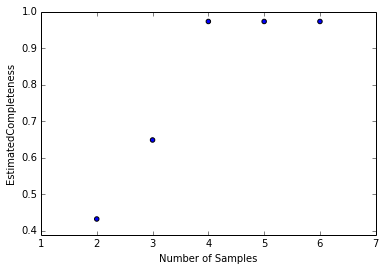

In [10]:
[markerGeneDF, taxonClass, tribes] = mg.importMarkerGenesAndTaxonomy(externalDataDir, 'phylosiftMarkerGenes.csv', 'taxonomySAGs.csv')
mg.allWorstCaseCompleteness(externalDataDir, markerGeneDF, 37, taxonClass, tribes, 'acI-B1')

It appears that all of the Phylosift marker genes have been encountered after 4 genomes have been sequenced. What about tribe acI-A7, for which we have four samples?

Sampling tribe acI-A7 with sample size 2.
The worst-case completeness is: 0.189189189189
Sampling tribe acI-A7 with sample size 3.
The worst-case completeness is: 0.432432432432
Sampling tribe acI-A7 with sample size 4.
The worst-case completeness is: 0.972972972973


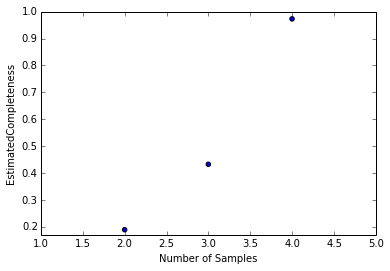

In [11]:
[markerGeneDF, taxonClass, tribes] = mg.importMarkerGenesAndTaxonomy(externalDataDir, 'phylosiftMarkerGenes.csv', 'taxonomySAGs.csv')
mg.allWorstCaseCompleteness(externalDataDir, markerGeneDF, 37, taxonClass, tribes, 'acI-A7')

We see a similar result, all marker genes have been encountered after 4 SAGs have been sequenced.

### Phylophlan Marker Genes

But this is a small set of marker genes. What if we consider Phylophlan's set of 400 genes?

Sampling tribe acI-B1 with sample size 2.
The worst-case completeness is: 0.5025
Sampling tribe acI-B1 with sample size 3.
The worst-case completeness is: 0.605
Sampling tribe acI-B1 with sample size 4.
The worst-case completeness is: 0.6575
Sampling tribe acI-B1 with sample size 5.
The worst-case completeness is: 0.6675
Sampling tribe acI-B1 with sample size 6.
The worst-case completeness is: 0.6775


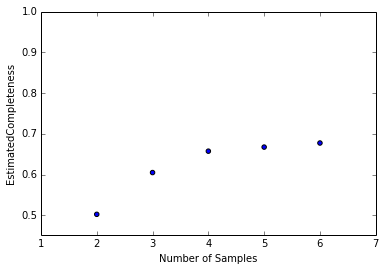

In [12]:
[markerGeneDF, taxonClass, tribes] = mg.importMarkerGenesAndTaxonomy(externalDataDir, 'phylophlanMarkerGenes.csv', 'taxonomySAGs.csv')
mg.allWorstCaseCompleteness(externalDataDir, markerGeneDF, 400, taxonClass, tribes, 'acI-B1')

The estimated completeness levels off around 70%. This is consistent with earlier observations about Phylophlan; namely, even fully complete freshwater genomes (such as Pnec) are predicted to be incomplete. This leveling off does occur around 4 SAGs, which suggests further sampling will not increase coverage of marker genes.

Sampling tribe acI-A7 with sample size 2.
The worst-case completeness is: 0.5325
Sampling tribe acI-A7 with sample size 3.
The worst-case completeness is: 0.7
Sampling tribe acI-A7 with sample size 4.
The worst-case completeness is: 0.725


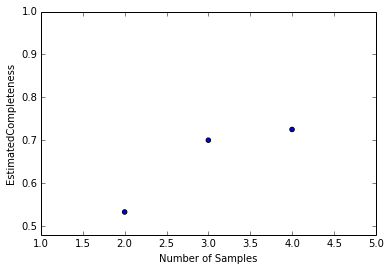

In [13]:
[markerGeneDF, taxonClass, tribes] = mg.importMarkerGenesAndTaxonomy(externalDataDir, 'phylophlanMarkerGenes.csv', 'taxonomySAGs.csv')
mg.allWorstCaseCompleteness(externalDataDir, markerGeneDF, 400, taxonClass, tribes, 'acI-A7')

Again estimated completeness appears to be leveling off after 4 SAGs.

### Core and Pan-Genomes

However, these estimates are only looking at the core genome of each tribe. There may be considerable diversity within the population, such that sequencing of additional SAGs would identify additional genes. The purpose of this module is to examine the size of the core- and pan-genomes for a tribe as the number of sampled tribes changes.

For this first pass, I will use COG categories from IMG. The core genome will be computed as all COG categories shared by all genomes, while the pan-genome will contain all COGs found in at least one genome. As in the above scenarios, I will do a worst-case analysis

The code below imports the COG abundance data.

In [14]:
[cogAbundance, taxonClass, tribes] = mg.importCogAndTaxonomy(externalDataDir, 'cogAbundance.csv', 'taxonomySAGs.csv')

We have 6 samples from the tribe acI-B1. Consider if we had sampled only two genomes. This function computes the size of the core- and pan-genomes for all possible pairings and returns the worst case scenario, e.g., the smallest pan-genome.

In [15]:
mg.worstCasePanGenome(externalDataDir, cogAbundance, taxonClass, tribes, 'acI-B1', 2)

                       Core Genome Pan Genome
(AAA023D18, AAA027J17)         300        755
(AAA023D18, AAA027L06)         390        805
(AAA023D18, AAA028A23)         312        697
(AAA023D18, AAA278I18)         342        710
(AAA023D18, AB141P03)          255        613
(AAA027J17, AAA027L06)         531        801
(AAA027J17, AAA028A23)         411        735
(AAA027J17, AAA278I18)         427        762
(AAA027J17, AB141P03)          264        741
(AAA027L06, AAA028A23)         520        766
(AAA027L06, AAA278I18)         530        799
(AAA027L06, AB141P03)          362        783
(AAA028A23, AAA278I18)         414        729
(AAA028A23, AB141P03)          321        638
(AAA278I18, AB141P03)          302        700
Sampling tribe acI-B1 with sample size 2.
The smallest pan genome is: 613
The largest pan genome is: 805


The smallest pan-gemome contains 613 genes, which is 76% of the largest (805 genes). Let's see how the size of the smallest pan-genome varies for different sample sizes. We'll also plot the core genome size for the worst-case sample.

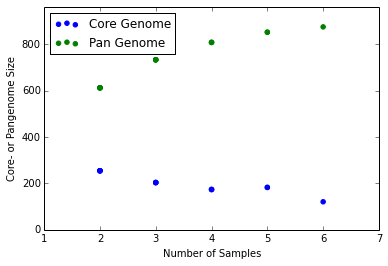

In [16]:
[cogAbundance, taxonClass, tribes] = mg.importCogAndTaxonomy(externalDataDir, 'cogAbundance.csv', 'taxonomySAGs.csv')
mg.allWorstCasePanGenome(externalDataDir, cogAbundance, taxonClass, tribes, 'acI-B1')

We may be close to fully sampling the acI-B1 pan-genome, as the curve appears to be leveling off. How about the acI-A7 tribe, for which we have four genomes?

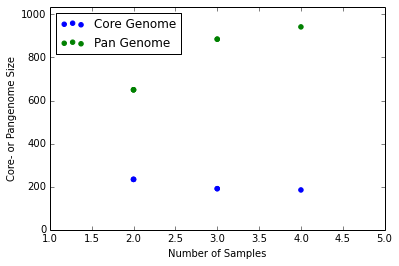

In [17]:
[cogAbundance, taxonClass, tribes] = mg.importCogAndTaxonomy(externalDataDir, 'cogAbundance.csv', 'taxonomySAGs.csv')
mg.allWorstCasePanGenome(externalDataDir, cogAbundance, taxonClass, tribes, 'acI-A7')

We could use some more samples.